In [1]:
import os
import torch

from fastai.vision.all import *
from fastai.vision.widgets import *

In [2]:
batch_size = 4

In [3]:
os.environ["TORCH_HOME"] = "Model"
os.environ["FASTAI_HOME"] = "Data"

In [4]:
torch.cuda.is_available()

False

In [5]:
image_dir = "Data/fish"
path = Path(image_dir)

In [6]:
fishes = DataBlock(
    blocks= (ImageBlock, CategoryBlock),
    get_items= get_image_files,
    get_y= parent_label,
    splitter= RandomSplitter(valid_pct= 0.2, seed= 42),
    item_tfms= Resize(128))

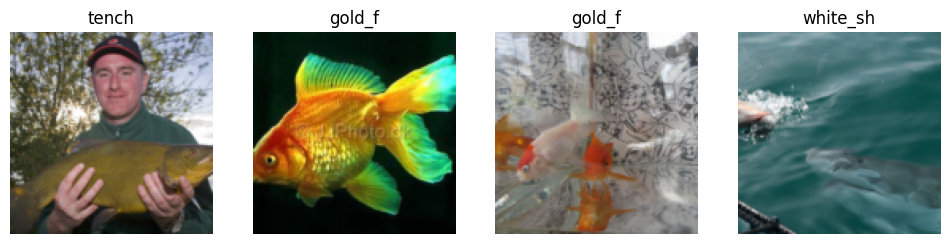

In [7]:
dls = fishes.dataloaders(path, bs= batch_size)
dls.valid.show_batch(max_n= 4, nrows= 1)

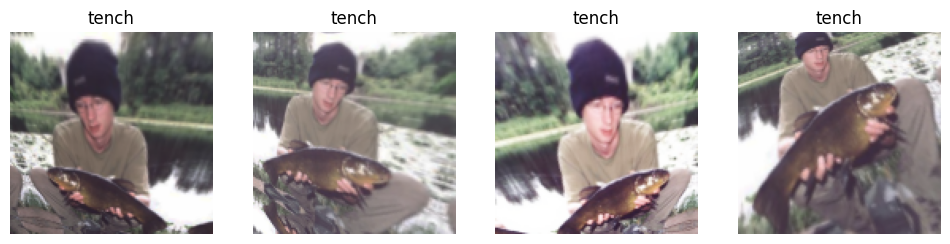

In [8]:
fishes = fishes.new(
    item_tfms= Resize(128),
    batch_tfms= aug_transforms(mult= 2))
dls = fishes.dataloaders(path, bs= 4)
dls.train.show_batch(max_n= 4, nrows= 1, unique= True)

In [9]:
fishes = fishes.new(
    item_tfms= RandomResizedCrop(224, min_scale= 0.5),
    batch_tfms= aug_transforms())
dls = fishes.dataloaders(path, bs= batch_size)

learner = cnn_learner(dls, resnet18, metrics= error_rate)
learner.fine_tune(2)

/home/deijauv/venv_cvsion/lib/python3.9/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/home/deijauv/venv_cvsion/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/deijauv/venv_cvsion/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.692109,0.655791,0.166667,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.719754,0.417038,0.166667,00:05
1,0.821301,0.559998,0.166667,00:05


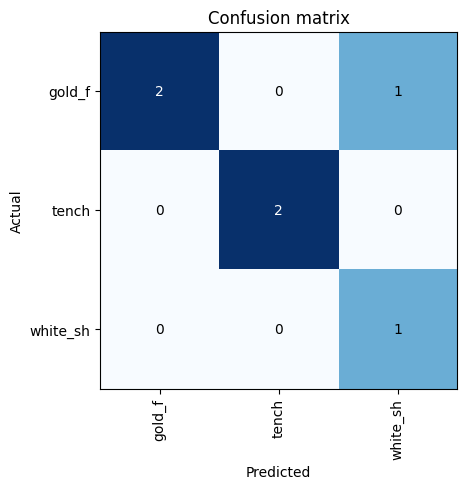

In [10]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix()

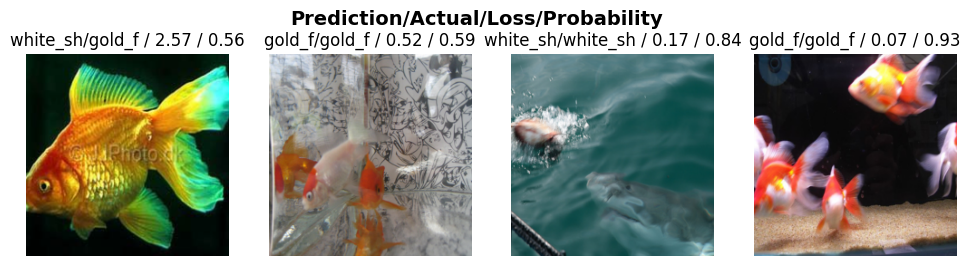

In [11]:
interp.plot_top_losses(4, nrows= 1)

In [12]:
cleaner = ImageClassifierCleaner(learner)
cleaner

In [13]:
for path in cleaner.fns:
    print(path)

Data/fish/gold_f/n01443537_11787.JPEG
Data/fish/gold_f/n01443537_11816.JPEG
Data/fish/gold_f/n01443537_11916.JPEG
Data/fish/gold_f/n01443537_11709.JPEG
Data/fish/gold_f/n01443537_11730.JPEG
Data/fish/gold_f/n01443537_11715.JPEG
Data/fish/gold_f/n01443537_11773.JPEG


In [14]:
export_PATH = "Learner/export.pkl"
learner.export(export_PATH)

path = Path("Learner/")
path.ls()

(#1) [Path('Learner/export.pkl')]